In [3]:
### Alle notwendingen Libraries werden Importiert 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_palette('cool')
import import_ipynb
import tensorflow as tf
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import Titanic

import MakeMNIST
import cv2

In [19]:
#### OVER - UNDERFITTING ####

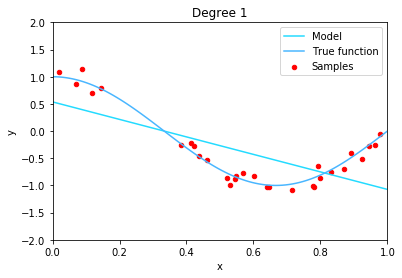

In [20]:
## Hier steht die wahre Funktion woher die Daten sind
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0) # Damit wir immer die selben Datenpunkte bekommen

n_samples = 30 # Anzahl der Datenpunkte




### YOUR CODE HERE #########

degr = 1 # Grad des Polynoms

###########################



# Die Beispieldaten werden generiert
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1 # Noise


polynomial_features = PolynomialFeatures(degree=degr, include_bias=False)
linear_regression = LinearRegression()

# Mehrere Modelle werden erstellt
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

# Die Modelle werden validiert, damit das beste gefunden wird
scores = cross_val_score(pipeline, X[:, np.newaxis], y,scoring="neg_mean_squared_error", cv=10)

# Ein Graph wird erstellt, mit den Testdaten, den Samples und dem vorhergesagten Modell
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, color = "r" , s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}".format(degr))
plt.show()

In [ ]:
##### IMAGE CLASSIFICATION ######

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


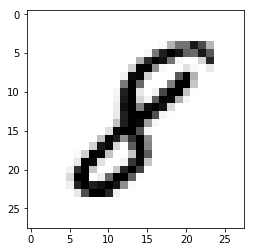

In [22]:
### EIN BILD ANZEIGEN
image_index = 7777 #Alles bis 60,000 ist möglich
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [23]:
print("shape training datensatz: " + str(x_train.shape))
print("shape test datensatz: " + str(x_test.shape))

shape training datensatz: (60000, 28, 28)
shape test datensatz: (10000, 28, 28)


In [24]:
"""
Format: (Anzahl der Bilder, Bildhöhe, Bildbreite)
28 x 28 ist die anzahl der Pixel pro Bild
"""

'\nFormat: (Anzahl der Bilder, Bildhöhe, Bildbreite)\n28 x 28 ist die anzahl der Pixel pro Bild\n'

In [25]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [26]:
## nutzt die Bausteine um ein Modell zu erstellen. Nutzt verschidene Activation Functions/Layers/Optimizers 
"""
Activations:
softmax
elu
relu
tanh
sigmoid
linear
"""



model = Sequential()
 
model.add(Conv2D(28, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
"""
model = Sequential() # das Modell wird initialisiert

#### YOUR CODE HERE #####
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu)) # normales NN Layer
model.add(Dropout(0.2))


## Das Output Layer für die 10 möglichen Zahlen
model.add(Dense(10,activation=tf.nn.softmax)) 
"""


'\nmodel = Sequential() # das Modell wird initialisiert\n\n#### YOUR CODE HERE #####\nmodel.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Flatten()) # Flattening the 2D arrays for fully connected layers\nmodel.add(Dense(128, activation=tf.nn.relu)) # normales NN Layer\nmodel.add(Dropout(0.2))\n\n\n## Das Output Layer für die 10 möglichen Zahlen\nmodel.add(Dense(10,activation=tf.nn.softmax)) \n'

In [27]:
#### Probiert verschiedene optimizer/ epochen aus und trainiert das Modell
"""
Optimizer:
SGD
RMSprop
Adagrad
Adadelta
Adam

Verschiedene Anzahl von Epochen
"""

#Keras
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
"""
# Other Tutorial
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
"""
model.fit(x=x_train,y=y_train, epochs=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2942 - acc: 0.9096


In [28]:
### Dieser Code ist zum evaluieren eures Modells
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 554us/step


[0.0952693460687995, 0.9796]

6


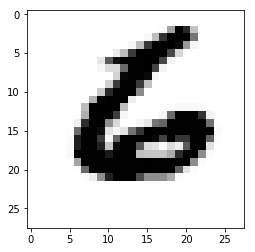

In [29]:
#### Hiermit kann ein bestimmtes Bild getestet werden
image_index = 9999 # Alle Zahlen bis 9999 gehen
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [30]:
flatten = MakeMNIST.img_to_mnist("eight.jpg", "acht_classified")
plt.imshow(flatten.reshape(28, 28),cmap='Greys')
pred = model.predict(flatten.reshape(1, 28, 28, 1))
print(pred.argmax())

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [31]:
### TITANIC ###

training_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv('./data/test.csv')
# training_data.head()

training_data, test_data = Titanic.data_engeneer_function(training_data, test_data)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


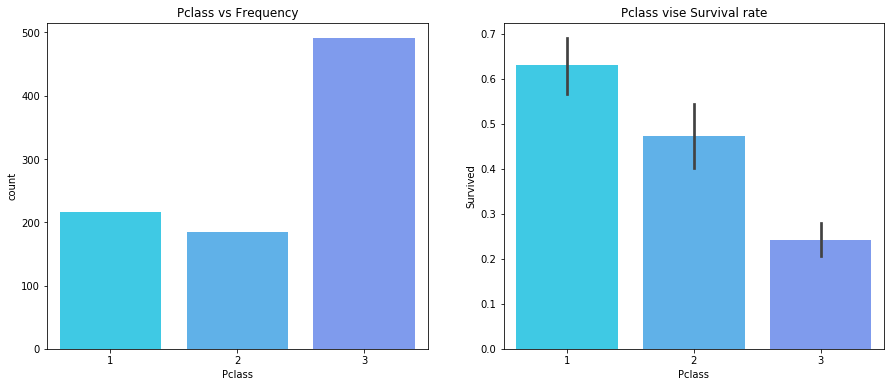

In [32]:
Titanic.show_class_survival(training_data)

In [33]:
X_train, X_test, y_train, y_test = Titanic.prepare_data(training_data)
accuracies = []

In [34]:
#### LOGISTIC REGRESSION ####
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
lr_score = classifier.score(X_test, y_test)
accuracies.append(lr_score)
print(lr_score)

0.8552631578947368


In [36]:
#### SUPPORT VECTOR MACHINE ####
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
svm_score = svm.score(X_test, y_test)
accuracies.append(svm_score)
print(svm_score)

0.868421052631579


In [38]:
#### K Nearest Neighbours ####
knn = KNeighborsClassifier(p=2, n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [39]:
knn_score = knn.score(X_test, y_test)
accuracies.append(knn_score)
print(knn_score)

0.8486842105263158


In [40]:
#### Random Forest ####
rdmf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rdmf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
rdmf_score = rdmf.score(X_test, y_test)
accuracies.append(rdmf_score)
print(rdmf_score)

0.8223684210526315


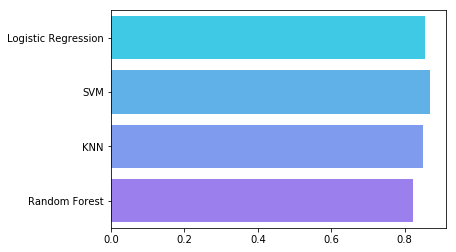

In [42]:
myLabels = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest']
fig1_accu= sns.barplot(x=accuracies, y=myLabels)